In [1]:
setwd("C:/Users/mlene/Desktop/DOC TEMP/Kaggle/Lending Club Loan Data")

Download libraries

In [8]:
install.packages("naniar")
install.packages("mice")
install.packages("lattice")
install.packages("Amelia")
library(naniar)
library(readr)
library(dplyr)
library(ggplot2)
library(lattice)
library(mice)
library(Amelia)

Warning message:
"package 'naniar' is in use and will not be installed"also installing the dependencies 'minqa', 'nloptr', 'RcppEigen', 'ucminf', 'lme4', 'ordinal', 'pan', 'jomo', 'mitml'



package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'ucminf' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'ordinal' successfully unpacked and MD5 sums checked
package 'pan' successfully unpacked and MD5 sums checked
package 'jomo' successfully unpacked and MD5 sums checked
package 'mitml' successfully unpacked and MD5 sums checked
package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mlene\AppData\Local\Temp\RtmpsdnQyq\downloaded_packages


Warning message:
"package 'lattice' is in use and will not be installed"also installing the dependency 'RcppArmadillo'



package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mlene\AppData\Local\Temp\RtmpsdnQyq\downloaded_packages



Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


Read data and fill in NA

In [5]:
lcloan <- read_csv("lcloan.csv", na = c("", "NA", "UNKNOWN"))
glimpse(lcloan)

lcloan2 <- lcloan %>%
  select(loan_amnt, funded_amnt, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, addr_state, dti, delinq_2yrs, inq_last_6mths, mths_since_last_delinq, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, inq_last_12m, delinq_amnt, mort_acc, percent_bc_gt_75, pub_rec_bankruptcies, hardship_flag, hardship_type, hardship_reason, debt_settlement_flag)

Parsed with column specification:
cols(
  .default = col_double(),
  id = col_logical(),
  member_id = col_logical(),
  term = col_character(),
  grade = col_character(),
  sub_grade = col_character(),
  emp_title = col_character(),
  emp_length = col_character(),
  home_ownership = col_character(),
  verification_status = col_character(),
  issue_d = col_character(),
  loan_status = col_character(),
  pymnt_plan = col_character(),
  url = col_logical(),
  desc = col_logical(),
  purpose = col_character(),
  title = col_character(),
  zip_code = col_character(),
  addr_state = col_character(),
  earliest_cr_line = col_character(),
  initial_list_status = col_character()
  # ... with 29 more columns
)
See spec(...) for full column specifications.
Warning message:
"163376 parsing failures.
  row                       col           expected actual         file
92797 debt_settlement_flag_date 1/0/T/F/TRUE/FALSE Feb-19 'lcloan.csv'
92797 settlement_status         1/0/T/F/TRUE/FALSE ACTIVE '

Observations: 1,048,575
Variables: 145
$ id                                         <lgl> NA, NA, NA, NA, NA, NA, ...
$ member_id                                  <lgl> NA, NA, NA, NA, NA, NA, ...
$ loan_amnt                                  <dbl> 2500, 30000, 5000, 4000,...
$ funded_amnt                                <dbl> 2500, 30000, 5000, 4000,...
$ funded_amnt_inv                            <dbl> 2500, 30000, 5000, 4000,...
$ term                                       <chr> "36 months", "60 months"...
$ int_rate                                   <dbl> 13.56, 18.94, 17.97, 18....
$ installment                                <dbl> 84.92, 777.23, 180.69, 1...
$ grade                                      <chr> "C", "D", "D", "D", "C",...
$ sub_grade                                  <chr> "C1", "D2", "D1", "D2", ...
$ emp_title                                  <chr> "Chef", "Postmaster", "A...
$ emp_length                                 <chr> "10+ years", "10+ years"...
$ home_owners

View missing data

In [6]:
miss_var_table(lcloan2)
miss_var_summary(lcloan2)

n_miss_in_var,n_vars,pct_vars
0,25,67.567568
1,1,2.702703
1197,1,2.702703
12516,1,2.702703
23305,1,2.702703
90440,1,2.702703
97616,1,2.702703
538776,1,2.702703
970290,1,2.702703
970294,1,2.702703


variable,n_miss,pct_miss
hardship_type,1048575,1.000000e+02
hardship_reason,1048575,1.000000e+02
verification_status_joint,975264,9.300851e+01
dti_joint,970294,9.253453e+01
annual_inc_joint,970290,9.253415e+01
mths_since_last_delinq,538776,5.138173e+01
inq_last_12m,97616,9.309396e+00
emp_title,90440,8.625039e+00
title,23305,2.222540e+00
percent_bc_gt_75,12516,1.193620e+00


Warning message in if (class(obj) == "amelia") {:
"the condition has length > 1 and only the first element will be used"Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'imputations'."

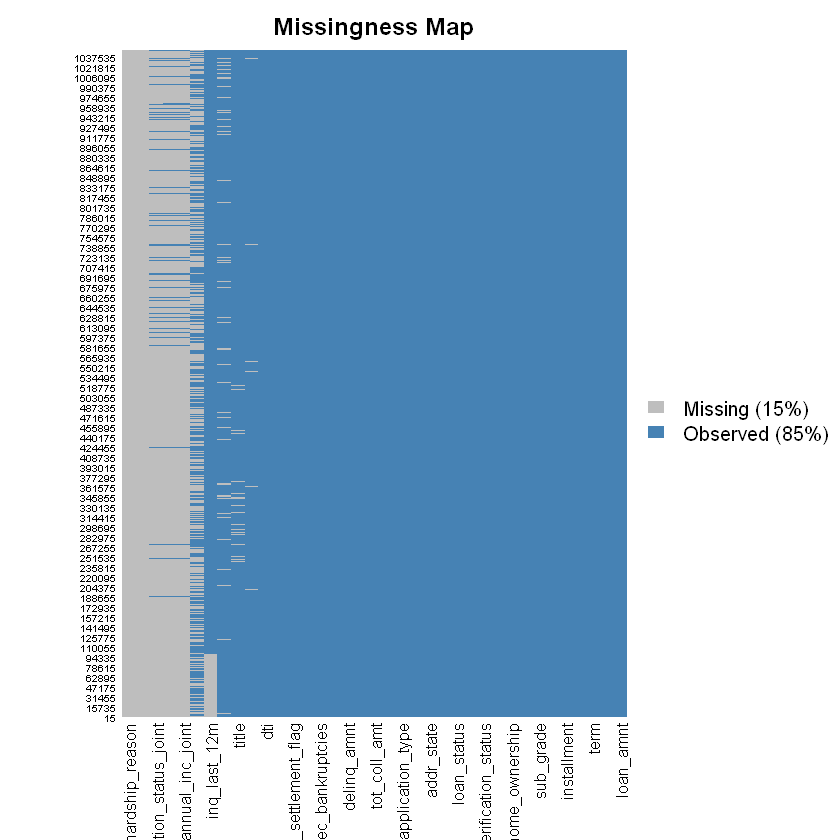

In [9]:
missmap(lcloan2, col=c('grey', 'steelblue'), y.cex=0.5, x.cex=0.8)

In [10]:
sort(sapply(lcloan2, function(x) { sum(is.na(x)) }), decreasing=TRUE)

hardship_type           hardship_reason verification_status_joint 
                  1048575                   1048575                    975264 
                dti_joint          annual_inc_joint    mths_since_last_delinq 
                   970294                    970290                    538776 
             inq_last_12m                 emp_title                     title 
                    97616                     90440                     23305 
         percent_bc_gt_75                       dti            inq_last_6mths 
                    12516                      1197                         1 
                loan_amnt               funded_amnt                      term 
                        0                         0                         0 
                 int_rate               installment                     grade 
                        0                         0                         0 
                sub_grade                emp_length            home_ownership 
                        0                         0                         0 
               annual_inc       verification_status                   issue_d 
                        0                         0                         0 
              loan_status                   purpose                addr_state 
                        0                         0                         0 
              delinq_2yrs          application_type            acc_now_delinq 
                        0                         0                         0 
             tot_coll_amt               tot_cur_bal               delinq_amnt 
                        0                         0                         0 
                 mort_acc      pub_rec_bankruptcies             hardship_flag 
                        0                         0                         0 
     debt_settlement_flag 
                        0

From the tables created by miss_var functions, map of missingness, and other outputs, we can see that while most variables are
in complete cases, these variablaes have missing values in decreasing order: hardship_type, hardship_reason, verification_status_joint, dti_joint, annual_inc_joint, mths_since_last_delinq, inq_last_12m, emp_title, title, percent_bc_gt_75, dti, and inq_last_6mths. 
Overall 15% of the data is missing. Usually the cut-off of acceptable missingness is 5%. Variables with missing values needs to be decided on how they are will be treated. For this exercise, cases with missing values will be dropped. Usually deleting observations is not preferrable as it will result in bias in estimates. 

Create new dataset with interested variables (dropping variables with missing values)

In [11]:
lcloan3 <- lcloan2 %>%
  select(loan_amnt, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, loan_status, purpose, title, addr_state, dti, mort_acc, percent_bc_gt_75)

Explore missingness again with new dataset lcloan3

Warning message in if (class(obj) == "amelia") {:
"the condition has length > 1 and only the first element will be used"Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'imputations'."

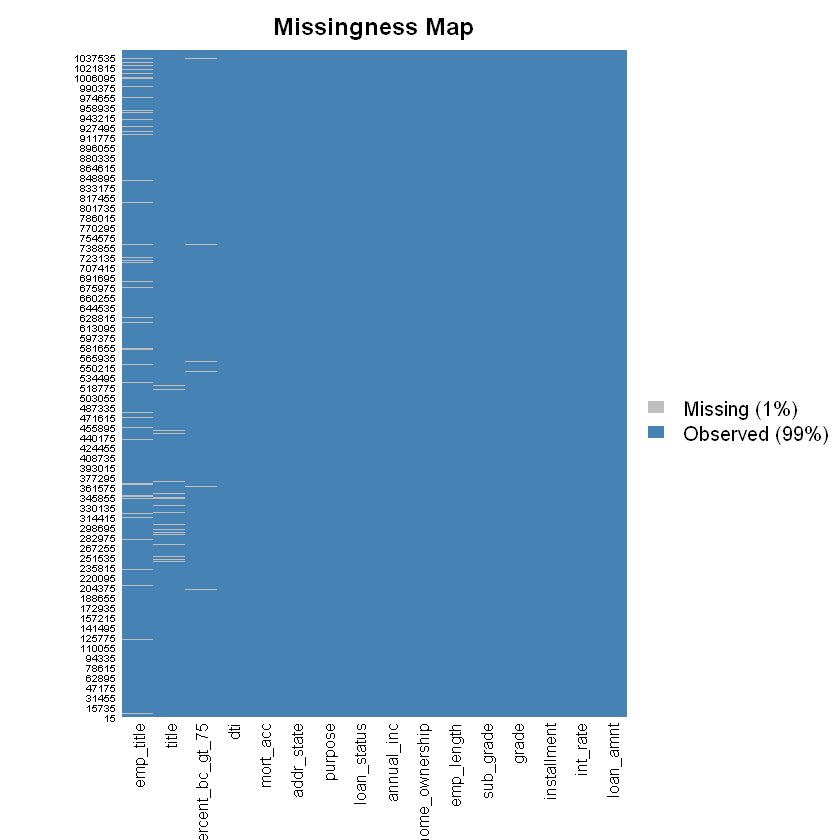

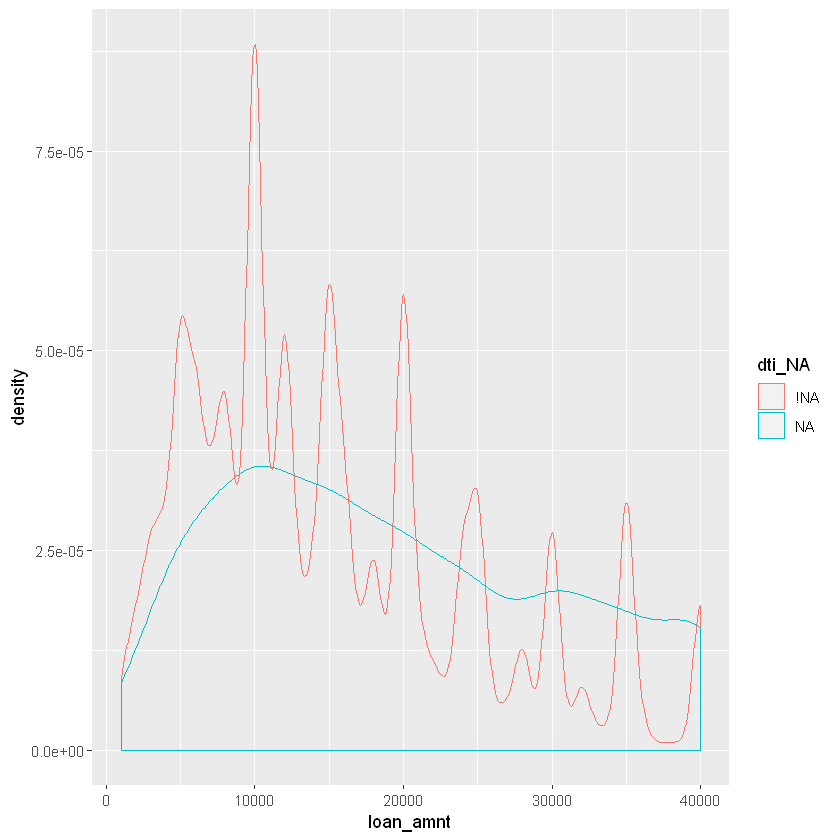

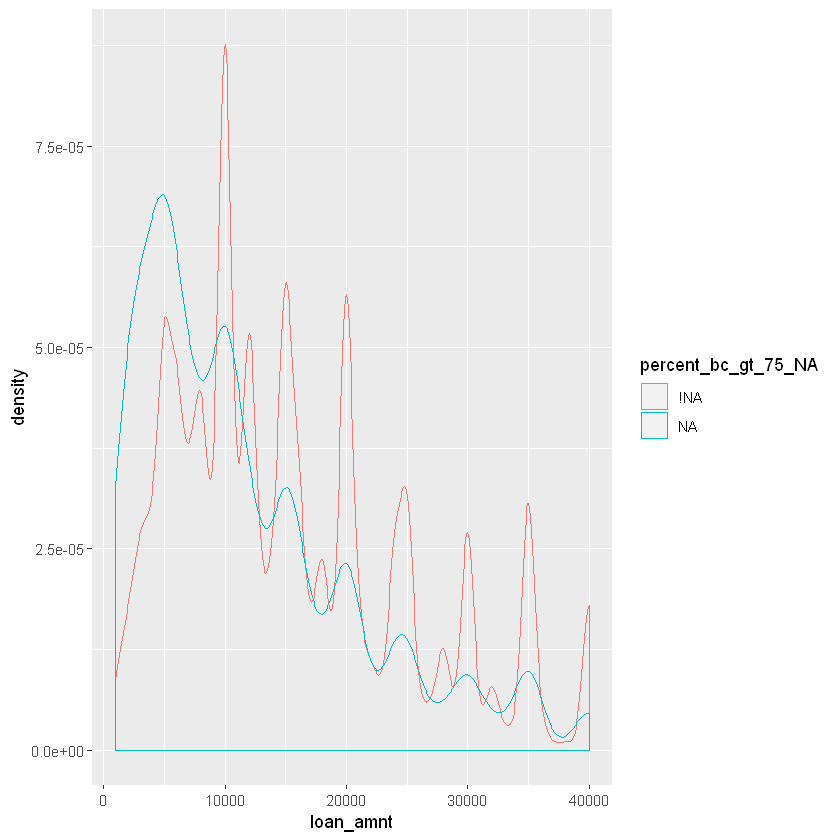

In [12]:
missmap(lcloan3, col=c('grey', 'steelblue'), y.cex=0.5, x.cex=0.8)
lcloan3 %>%
  bind_shadow() %>%
  ggplot(aes(x = loan_amnt, color = dti_NA)) + geom_density()

lcloan3 %>%
  bind_shadow() %>%
  ggplot(aes(x = loan_amnt, color = percent_bc_gt_75_NA)) + geom_density()

Densities plot of loan_amnt were plotted to investigate how the plot is when dti and percent_bc_gt_75 were missing and not missing. This is done by faceting for the 2 missing conditions. 
Exploring the missingness of lcloan3 reveals:
Loan amount doesnt change much when dti is present and absent.
Loan amount is less skewed(right) when percent_75 is absent.
Map of missingness is much better than before. 

Examining loan amount according purpose and its center measure, spread, form

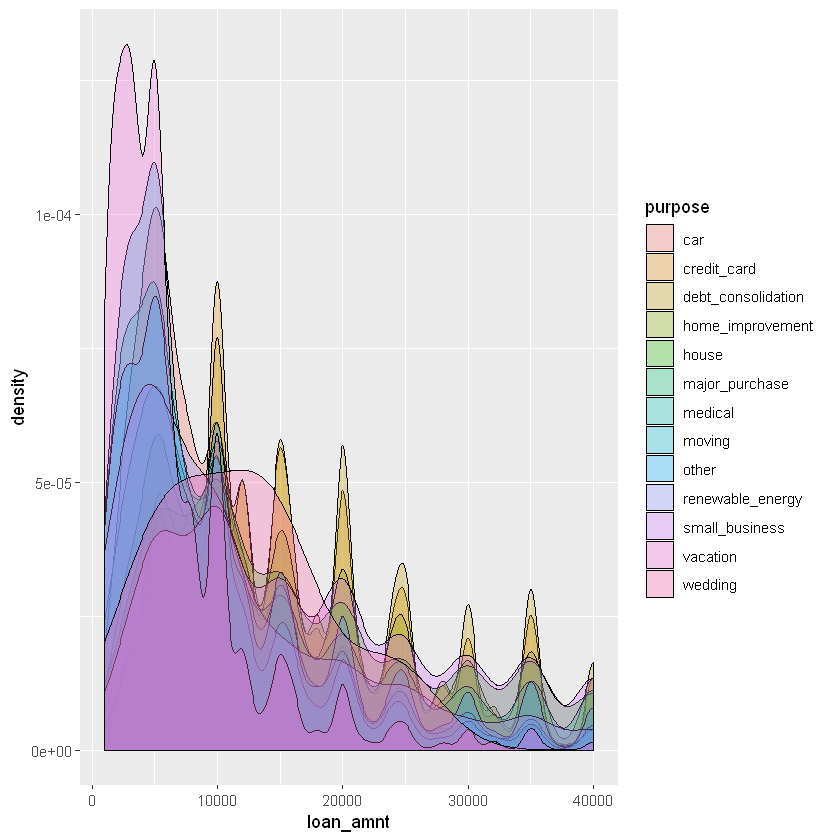

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


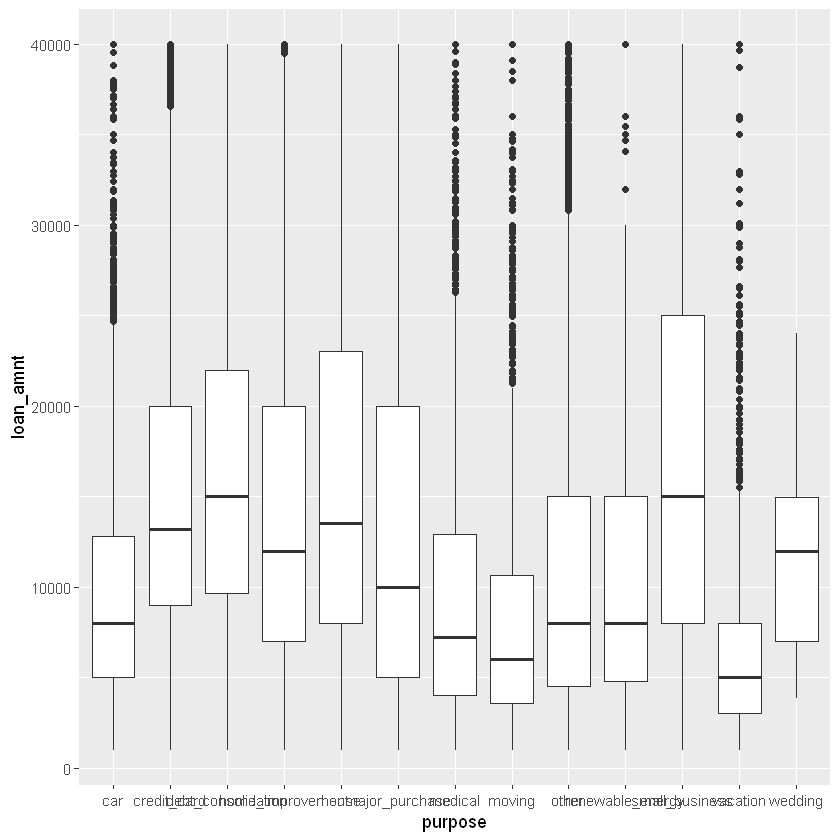

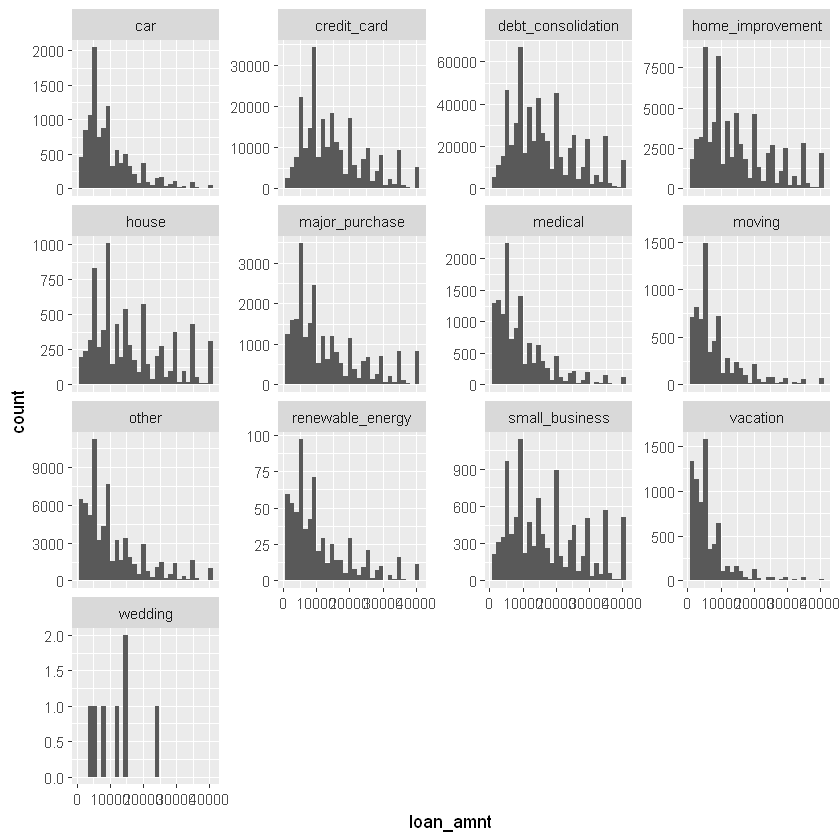

In [13]:
ggplot(lcloan3, aes(x = loan_amnt, fill = purpose)) + geom_density(alpha = 0.3)
ggplot(lcloan3, aes(x = purpose, y = loan_amnt)) + geom_boxplot() #determine form
ggplot(lcloan3, aes(x = loan_amnt)) + geom_histogram() + facet_wrap(~purpose, scales = "free_y")

Using density plot, box plots, and histograms to view the densities for each loan amount according to purpose and to determine its forms. All are unimodal and most are found to be rightly skewed. 
Credit card and debt_consoldation plots looks normal. While the rest are rightly skewed. 

For rightly skewed distributions i.e. car, house, home_improvement, major_purchase, medical, moving, other, renewable_energy, small_business, and vacation - find the center measure and spread. Plot boxplots and histograms to visualize.

purpose,median(loan_amnt),IQR(loan_amnt)
car,8000,7800.0
home_improvement,12000,13000.0
house,13500,15012.5
major_purchase,10000,15000.0
medical,7200,8900.0
moving,6000,7050.0
other,8000,10500.0
renewable_energy,8000,10200.0
small_business,15000,17000.0
vacation,5000,5000.0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


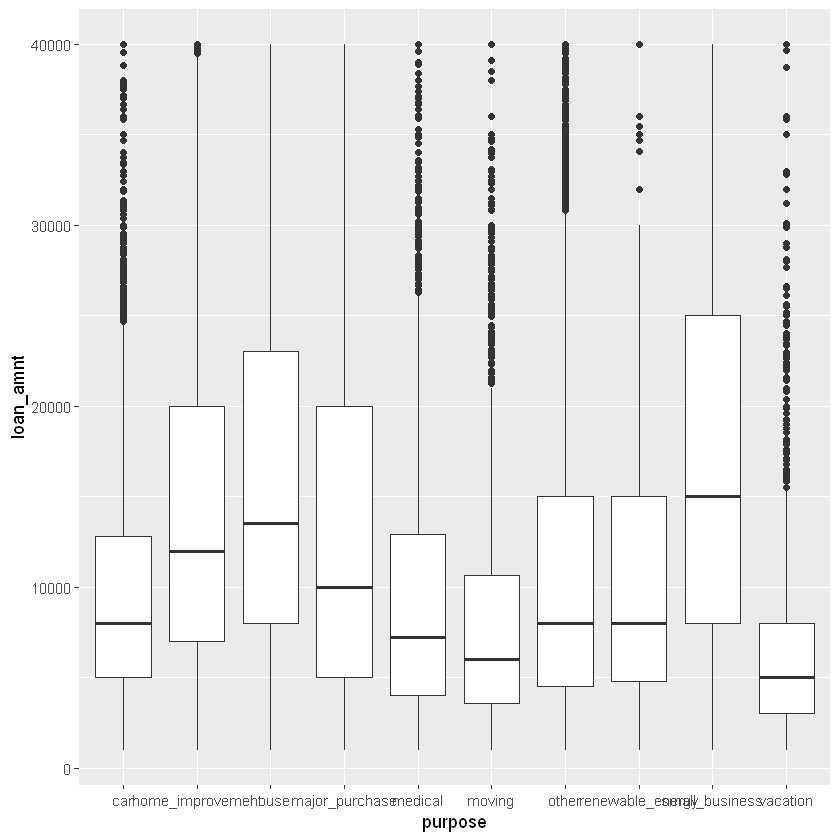

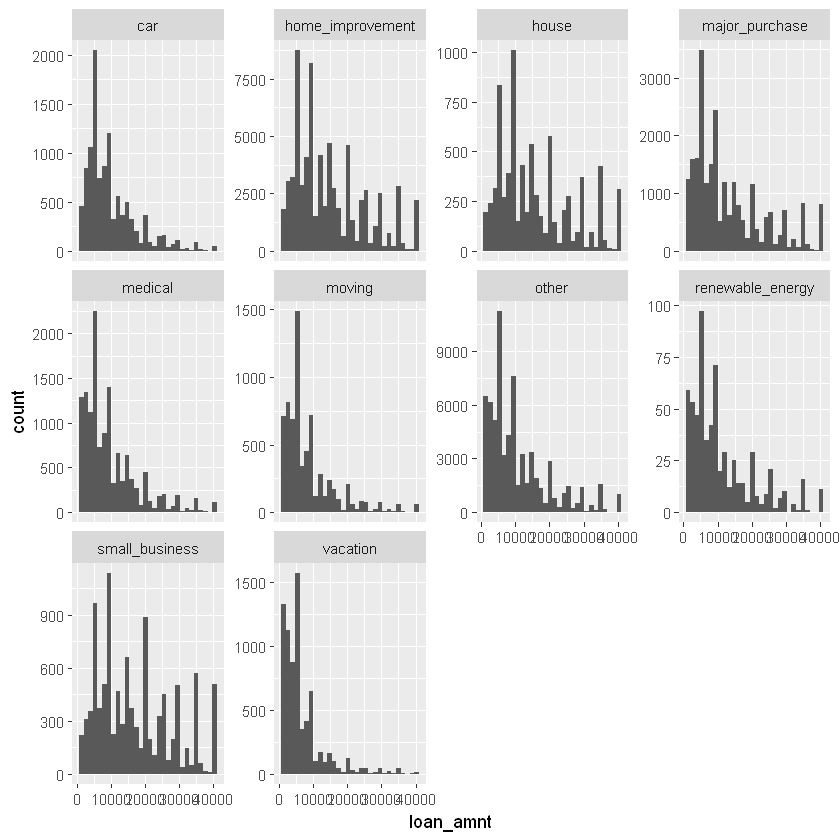

In [15]:
loan_sk <- lcloan3 %>%
  filter(purpose %in% c("car", "house", "home_improvement", "major_purchase", "medical", "moving", "other", "renewable_energy", "small_business", "vacation"))

loan_sk %>%
  group_by(purpose) %>%
  summarize(median(loan_amnt), IQR(loan_amnt))

ggplot(loan_sk, aes(x = purpose, y = loan_amnt)) + geom_boxplot()
ggplot(loan_sk, aes(x = loan_amnt)) + geom_histogram() + facet_wrap(~purpose, scales = "free_y")

For normal distribution i.e. credit_card and debt_consolidation, find center of measures and spread. Plot boxplot and histograms to visualize.

purpose,mean(loan_amnt),sd(loan_amnt)
credit_card,15496.25,9157.698
debt_consolidation,16415.01,9401.641


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


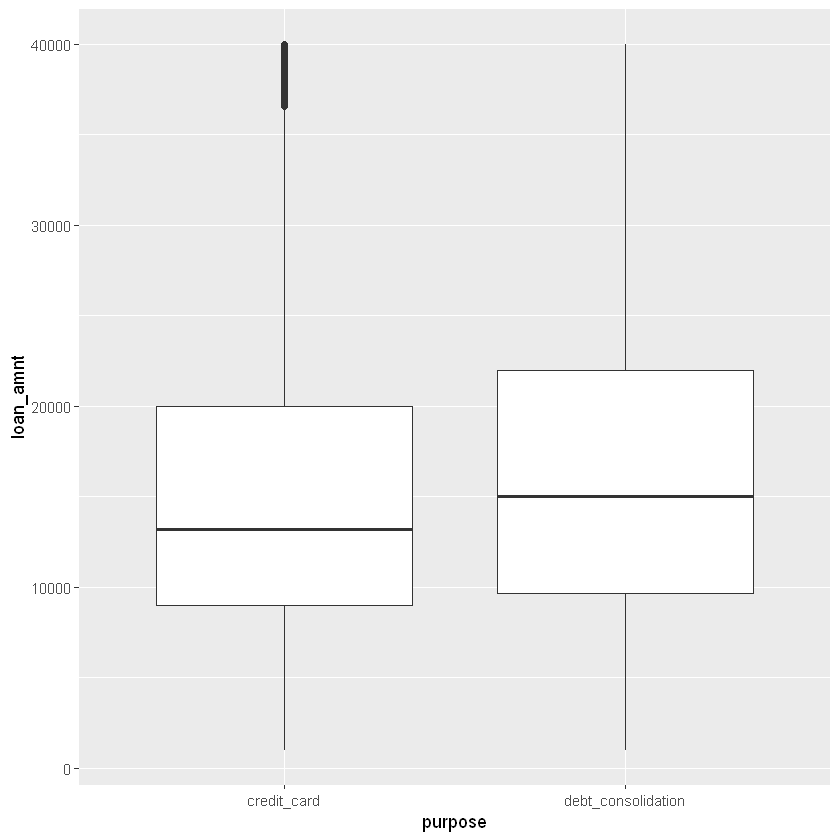

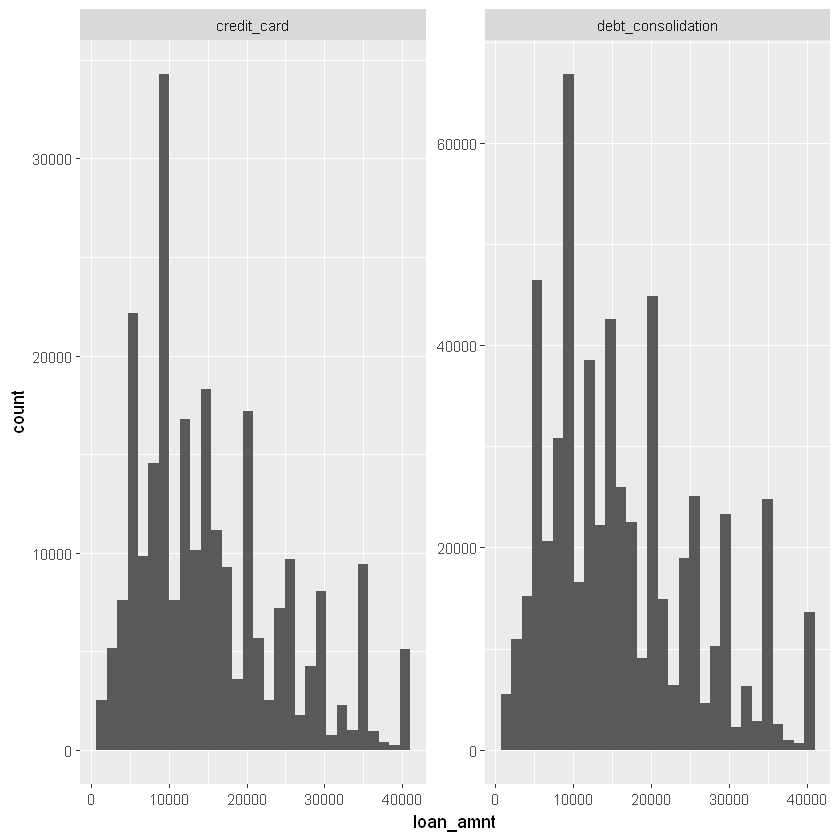

In [16]:
loan_N <- lcloan3 %>%
  filter(purpose %in% c("credit_card", "debt_consolidation"))

loan_N %>%
  group_by(purpose) %>%
  summarize(mean(loan_amnt), sd(loan_amnt))

ggplot(loan_N, aes(x = purpose, y = loan_amnt)) + geom_boxplot()
ggplot(loan_N, aes(x = loan_amnt)) + geom_histogram() + facet_wrap(~purpose, scales = "free_y")

Create bar plots to examine relationship between interested variables.

Top 25 common employments. 
Filter dataset to remove missing emp_title then create a new column that consists the percentage according to each employment. Create a bar plot to visualize.

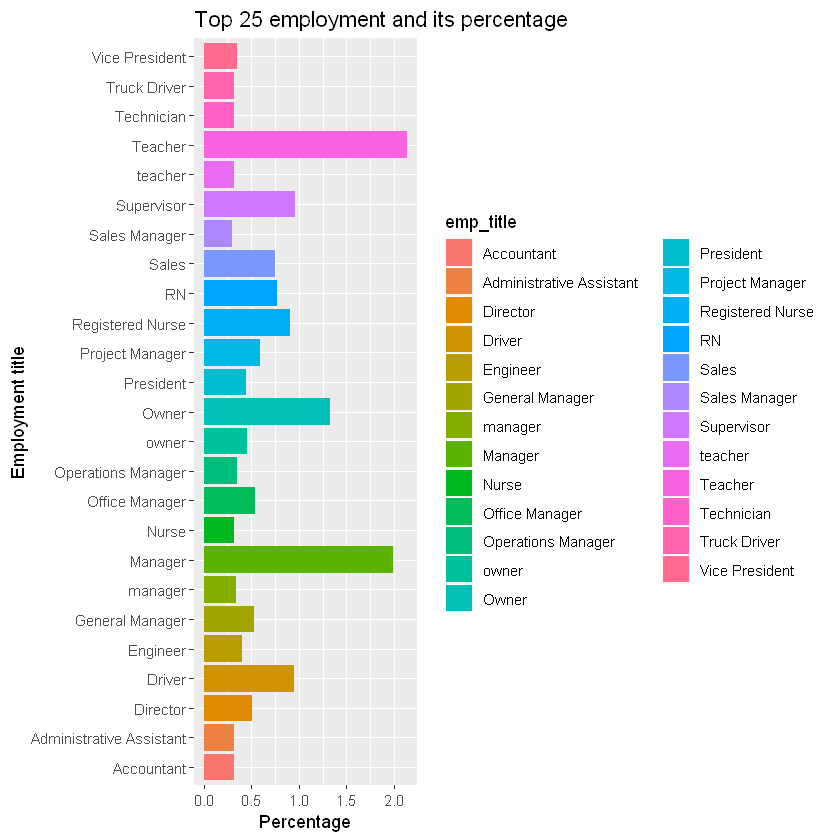

In [17]:
pct_emp <- lcloan3 %>%
  filter(!is.na(emp_title)) %>%
  count(emp_title) %>%
  mutate(pct_emp = (n/sum(n))*100) %>%
  arrange(desc(pct_emp))

pct_emp_25 <- pct_emp %>% 
  mutate(emp_title = as.factor(emp_title)) %>%
  arrange(desc(pct_emp)) %>% head(25)

ggplot(pct_emp_25, aes(x = emp_title, y = pct_emp, fill = emp_title)) + geom_col() +
coord_flip() +
labs(title = 'Top 25 employment and its percentage', x = 'Employment title', y = 'Percentage') +
scale_colour_viridis_d(option = "plasma")

Top 25 loan purpose
Filter data to remove any missing values in purpose then create a new column that consists the percentage for each purpose. Create a bar chart to visualize. 

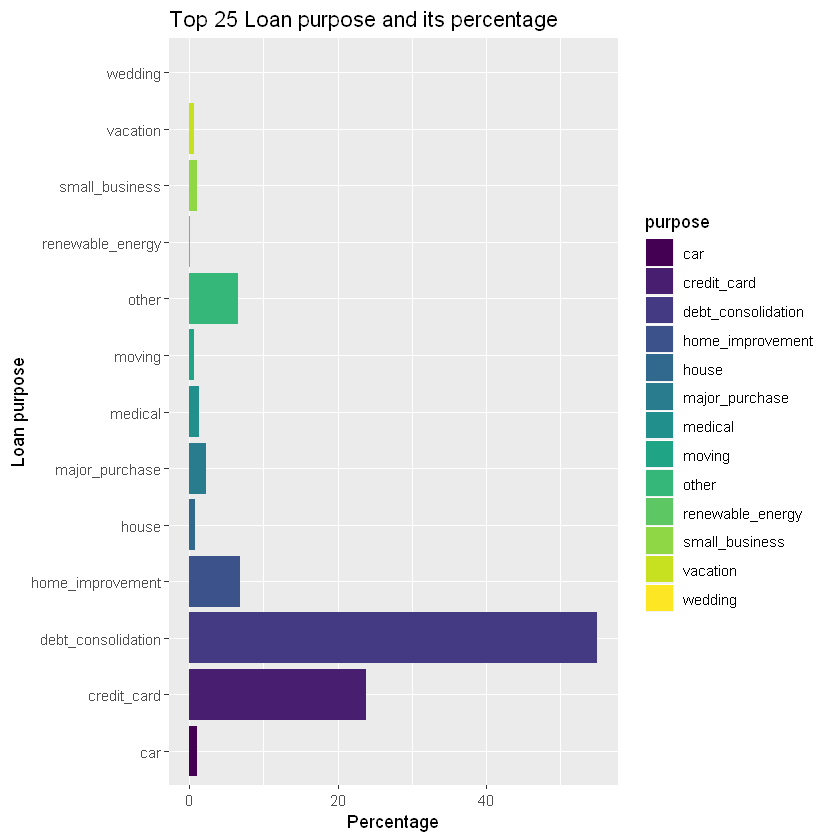

In [19]:
pct_purpose <- lcloan3 %>%
  filter(!is.na(purpose)) %>%
  mutate(purpose = as.factor(purpose)) %>%
  count(purpose) %>%
  mutate(pct_purpose = (n/sum(n))*100) %>%
  arrange(desc(pct_purpose))

pct_purpose_25 <- pct_purpose %>% arrange(desc(pct_purpose)) %>% head(25)

ggplot(pct_purpose_25, aes(x = purpose, y = pct_purpose, fill = purpose)) + geom_col() +
  coord_flip() +
  labs(title = 'Top 25 Loan purpose and its percentage', x = 'Loan purpose', y = 'Percentage') +
  scale_fill_viridis_d()

Examine loan status

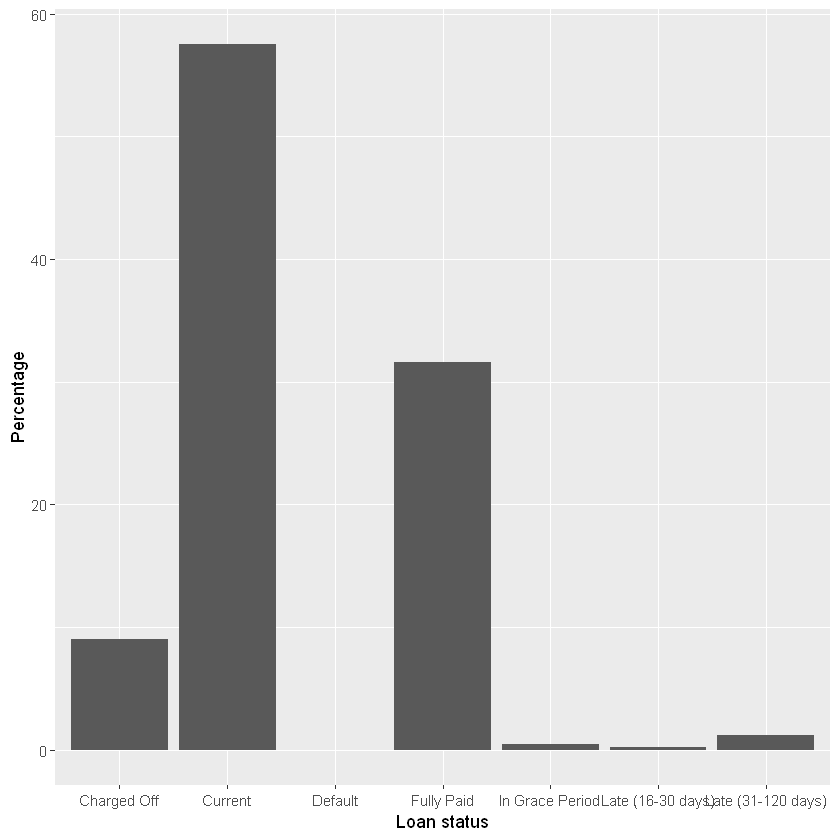

In [21]:
pct_status <- lcloan3 %>%
  select(loan_status) %>%
  mutate(loan_status = as.factor(loan_status)) %>%
  count(loan_status) %>%
  mutate(pct_status = (n/sum(n))*100) %>%
  arrange(desc(pct_status))

pct_status %>%
  ggplot(aes(x = loan_status, y = pct_status)) + geom_col() + labs(x = 'Loan status', y = 'Percentage')

Create dataset with variables - emp_title and title removed. Filter out oberservations with missing values in dti and percent_bc_gt_75. In normal circumstances, it is preferrable to impute the missing values rather than deleting them. 

Plot scatter plots and examine relationships betweeen loan amount and dti, int_rate, and percent_bc_gt_75.

Examine loan_status across states

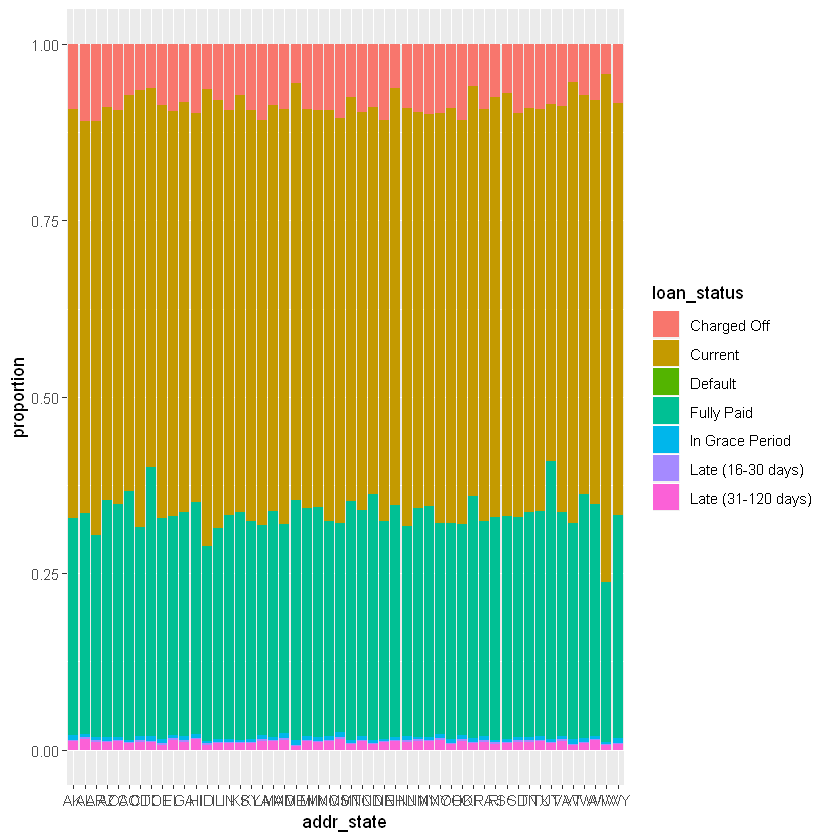

In [30]:
lcloan3 %>%
  ggplot(aes(x = addr_state, fill = loan_status)) + geom_bar(position = "fill") + ylab("proportion")

In [22]:
lcloan4 <- lcloan3 %>%
  select(-emp_title, -title) %>%
  filter(!is.na(dti), !is.na(percent_bc_gt_75))

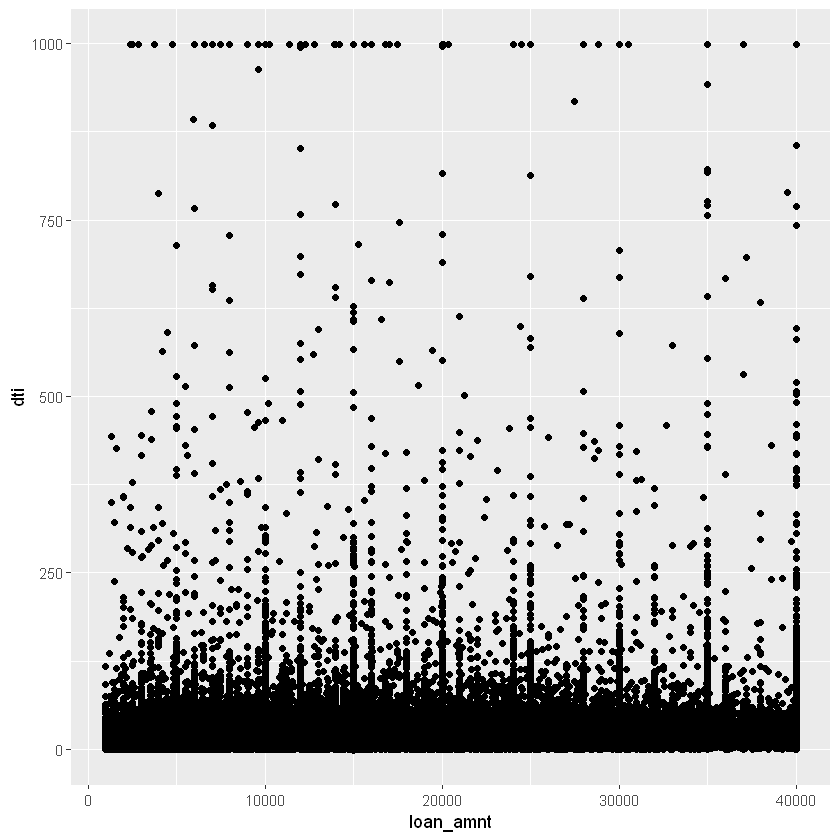

In [23]:
lcloan4 %>%
  ggplot(aes(x = loan_amnt, y = dti)) + geom_point() + scale_colour_gradientn(colours = terrain.colors(10))

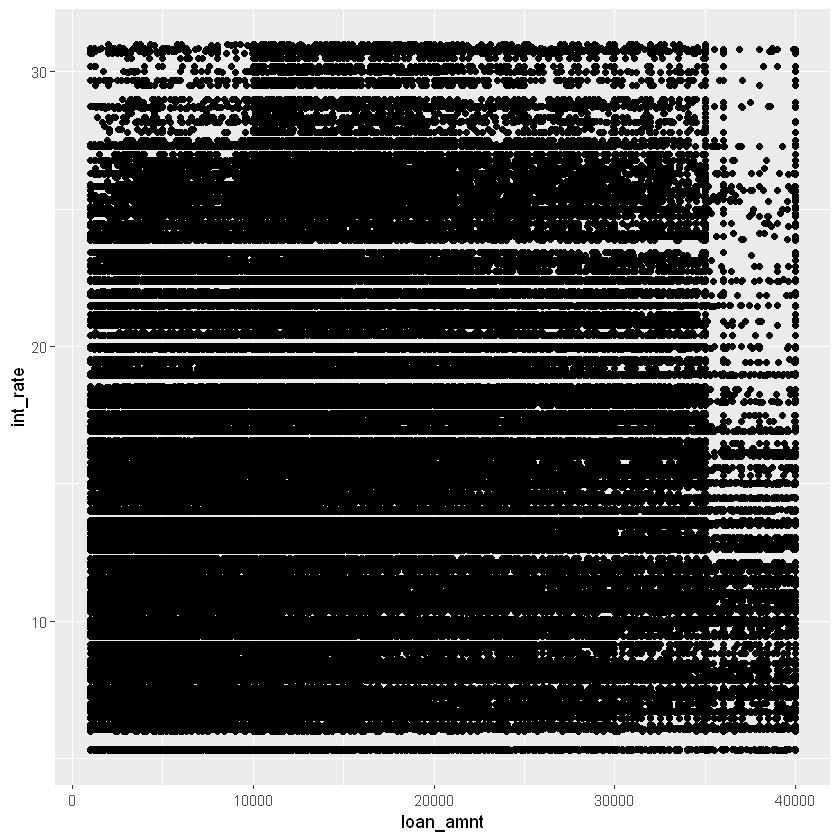

In [24]:
lcloan4 %>%
  ggplot(aes(x = loan_amnt, y = int_rate)) + geom_point(aes(color = z2))

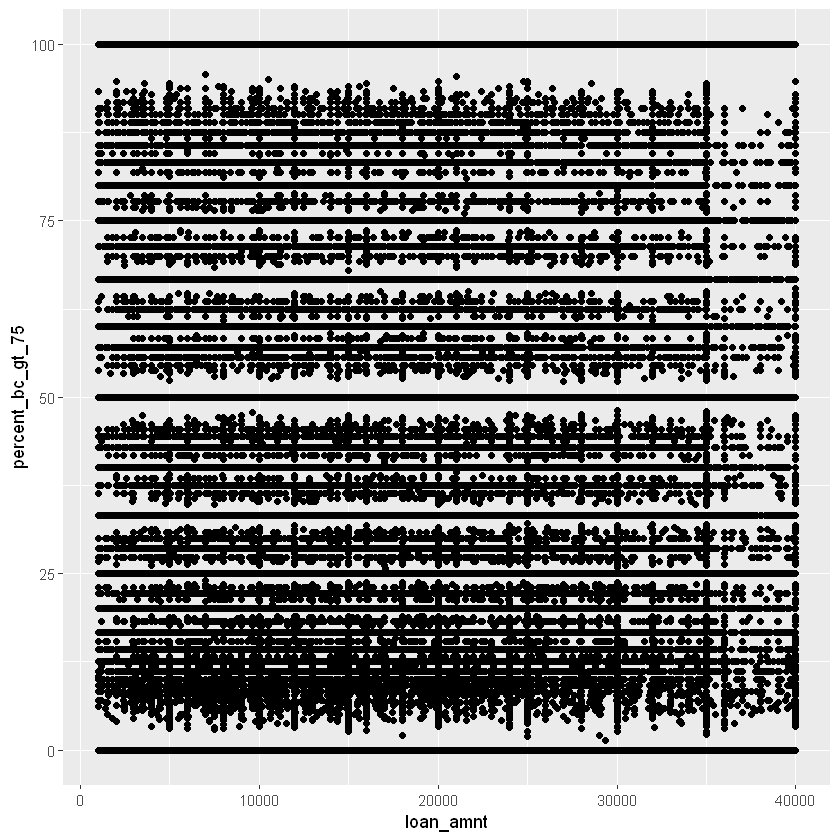

In [29]:
library(tidyr)

lcloan4 %>%
  ggplot(aes(x = loan_amnt, y = percent_bc_gt_75)) + geom_point()

In [ ]:
Typical person who fully paid off their loan

emp_length,medianinc,mediandti
< 1 year,62000.0,16.76
1 year,60000.0,16.95
10+ years,75000.0,17.72
2 years,65000.0,17.02
3 years,65000.0,17.03
4 years,66000.0,17.35
5 years,66000.0,17.19
6 years,68500.0,17.51
7 years,70000.0,17.47
8 years,70000.0,17.45


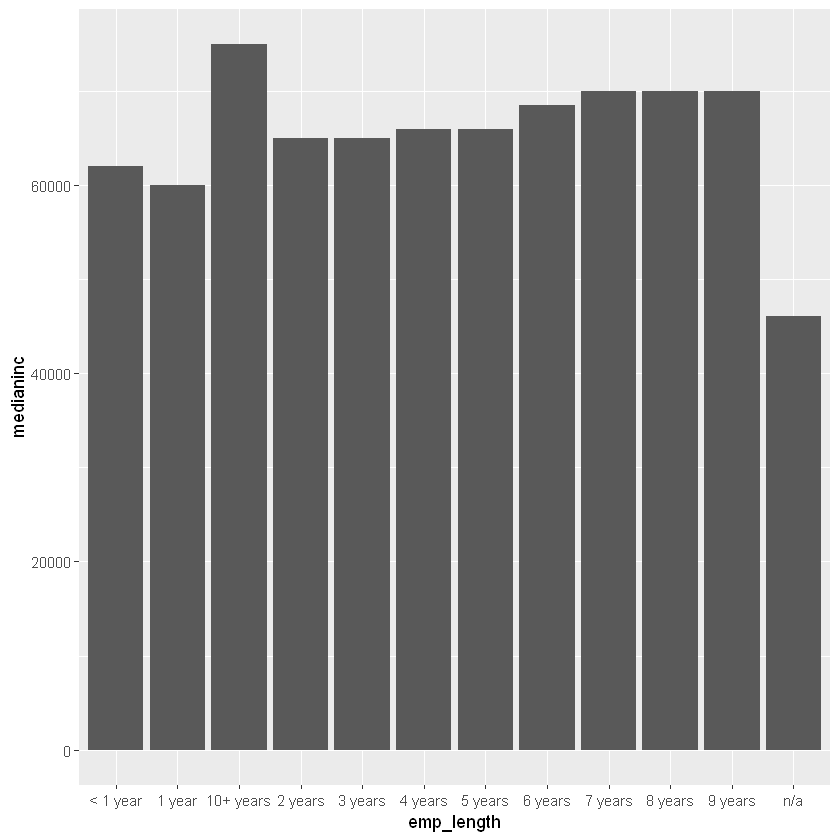

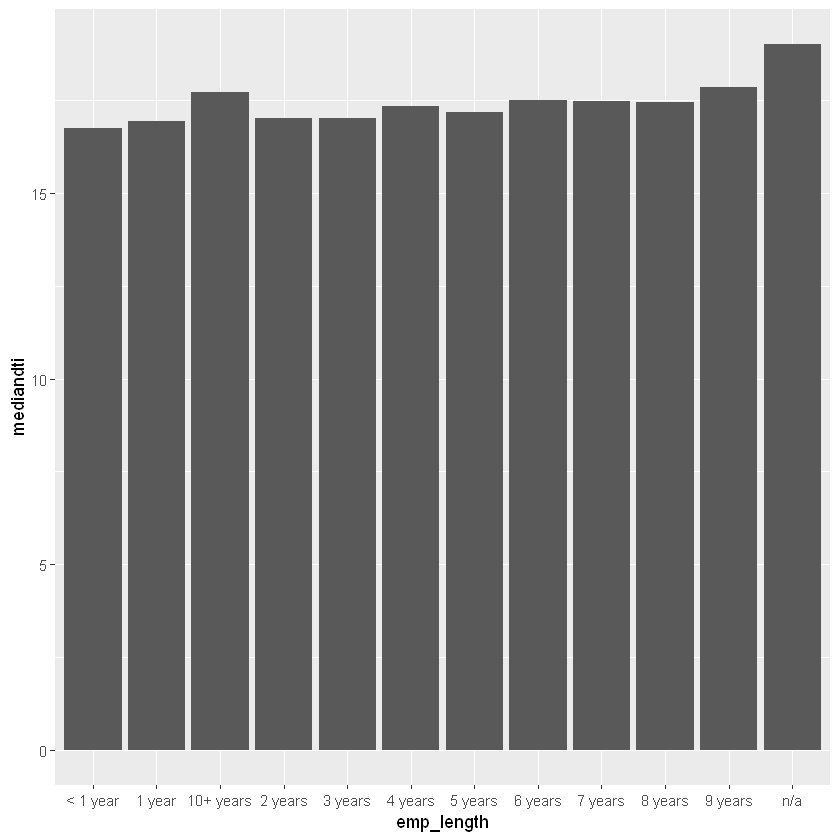

In [33]:
paidoff <- lcloan4 %>%
  filter(loan_status == "Fully Paid", !is.na(dti), !is.na(emp_length)) %>%
  group_by(emp_length) %>%
  summarize(medianinc = median(annual_inc), mediandti = median(dti))

paidoff

paidoff %>%
  ggplot(aes(x = emp_length, y = medianinc)) + geom_col()

paidoff %>%
  ggplot(aes(x = emp_length, y = mediandti)) + geom_col()

The typical person who paid off has worked for 10+ years and has debt-to-income ratio fo about 17.72, which is considerably high compared to other groups. Their median income is at $75K.

Typical person who default

emp_length,medianinc
< 1 year,21000
1 year,45000
10+ years,62000
2 years,70000
3 years,32200
4 years,86000
6 years,55000
7 years,89021
8 years,81949
n/a,43080


[1] 19.22

n
20


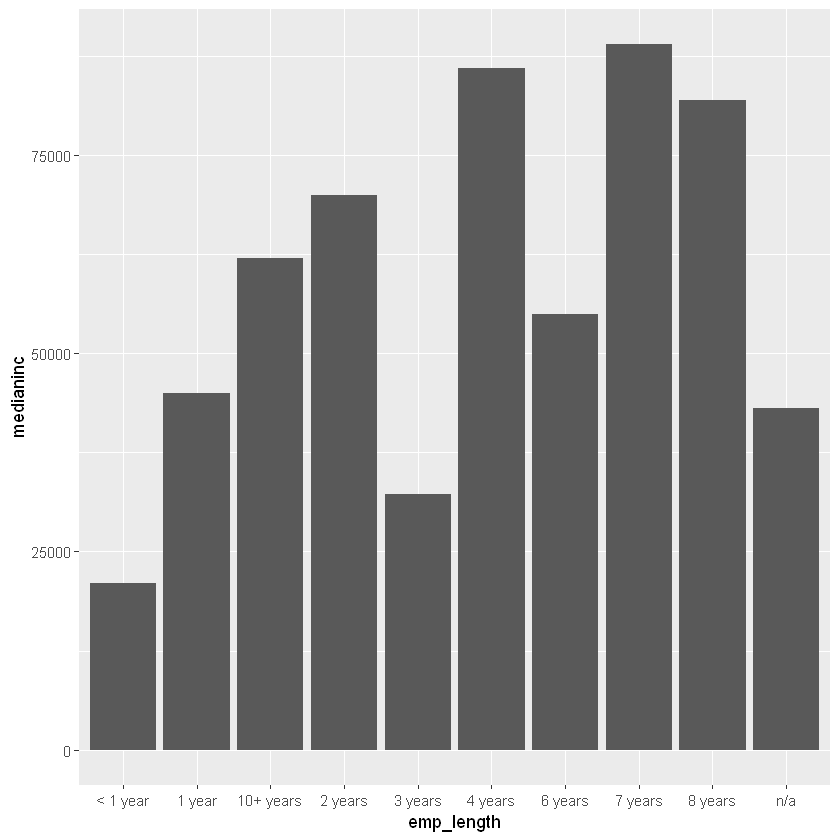

In [44]:
default <- lcloan4 %>%
  filter(loan_status == "Default") %>%
  group_by(emp_length) %>%
  summarize(medianinc = median(annual_inc))

default

default2 <- lcloan4 %>%
  filter(loan_status == "Default") 
median(default2$dti)
count(default2)

default %>%
  ggplot(aes(x = emp_length, y = medianinc)) + geom_col()

There are 20 who defaulted. Those who defaulted has pretty long employment lengths as well. Majority has 7 years, followed by 4 years, and 2 years with median incomes at $89K, $86K, and $70K respectively. This is a little surprising as one may suspect them to have much lower incomes than those who paid off their loan. The median debt-to-income ratio is 19.22 which is higher than those who paid off. 